# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

#print command only for testing purposes
#print(json.dumps(btc_response_data, indent=4))


In [6]:
# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

#print command only for testing purposes
#print(json.dumps(eth_response_data, indent=4))

In [7]:
# Compute current value of my crpto

btc_current_value = btc_response_data["data"]["1"]["quotes"]["CAD"]["price"]
eth_current_value = eth_response_data["data"]["1027"]["quotes"]["CAD"]["price"]

print(f"The current market price of BTC is ${btc_current_value:0.2f}")
print(f"The current market price of ETH is ${eth_current_value:0.2f}")

The current market price of BTC is $56322.54
The current market price of ETH is $3966.08


In [8]:
# Print current crypto wallet balance
my_btc_value = my_btc * btc_current_value 
my_eth_value = my_eth * eth_current_value 

#total crypto wallet balance 
total_crypto_balance = my_btc_value + my_eth_value

#print statements 
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"Total value of your crypto wallet is:  ${total_crypto_balance:0.2f}")

The current value of your 1.2 BTC is $67587.05
The current value of your 5.3 ETH is $21020.23
Total value of your crypto wallet is:  $88607.28


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [9]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [10]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [11]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-22", tz="America/New_York").isoformat()
 
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_Investments = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    #end= end_today,
    limit=1000).df

df_Investments.dropna(inplace=True)
# Drop the time component of the date
df_Investments.index = df_Investments.index.date
# Preview DataFrame
df_Investments.head() 

AGG                                       SPY                   \
              open    high      low   close   volume    open    high      low   
2021-09-22  116.11  116.25  116.005  116.19  6079965  436.05  440.03  433.747   

                              
             close    volume  
2021-09-22  437.83  91135278

In [12]:
# Pick AGG and SPY close prices
agg_close_price = df_Investments["AGG"]["close"].iloc[0]
                                                
spy_close_price = df_Investments["SPY"]["close"].iloc[0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: CAD ${agg_close_price:0.2f}")
print(f"Current SPY closing price: CAD ${spy_close_price:0.2f}")


Current AGG closing price: CAD $116.19
Current SPY closing price: CAD $437.83


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

#calculate total stock and bond investments
total_investments = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"Total value of your stock investments is:  ${total_investments:0.2f}")

The current value of your 50 SPY shares is $21891.50
The current value of your 200 AGG shares is $23238.00
Total value of your stock investments is:  $45129.50


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income=12000

In [15]:
# Create savings DataFrame
dict_savings = {'amount': [total_crypto_balance, total_investments]}
index_list = ['crypto', 'shares']
df_savings = pd.DataFrame(data=dict_savings, index=index_list)

# Display savings DataFrame
display(df_savings)

,amount
crypto,88607.278134
shares,45129.500000


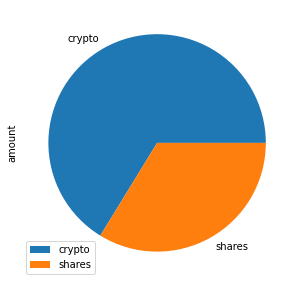

In [16]:
# Plot savings pie chart
plot = df_savings.plot.pie(y='amount', figsize=(5, 5))

In [17]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
print(f"Your ideal emergency fund is: ${emergency_fund:0.2f}")

Your ideal emergency fund is: $36000.00


In [18]:
# Calculate total amount of savings
combined_total_balance = total_crypto_balance + total_investments
print(f"Combined balance with Crypto and Investments: ${combined_total_balance:0.2f}")


Combined balance with Crypto and Investments: $133736.78


In [19]:
# Validate savings health

if combined_total_balance > emergency_fund:
    print("Congratulations! You have enough money in this fund")
elif combined_total_balance == emergency_fund:
        print("congratulating the person on reaching this financial goal.")
else:
     dollars_away = emergency_fund - combined_total_balance 
     print(f"Error: not enough funds! However, you are ${dollars_away:0.2f} from your financial goal")

Congratulations! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
# Format current date as ISO format
start_today2 = pd.Timestamp("2016-09-22", tz="America/New_York").isoformat()
stop_today2 = pd.Timestamp("2021-09-22", tz="America/New_York").isoformat()

In [21]:
# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_today2,
    end = stop_today2,
    limit=1000).df

#drop null values 
df_stock_data2.dropna(inplace=True)

# Drop the time component of the date
df_stock_data2.index = df_stock_data2.index.date
# Preview DataFrame
#df_stock_data2.tail()

# Display sample data
df_stock_data2.head()

AGG                                        SPY                  \
              open    high       low   close   volume    open    high     low   
2017-10-03  109.46  109.54  109.4000  109.52  2243369  252.46  252.89  252.23   
2017-10-04  109.56  109.57  109.4100  109.50  2130907  252.69  253.44  252.56   
2017-10-05  109.54  109.54  109.3701  109.44  1586971  253.51  254.68  253.40   
2017-10-06  109.22  109.42  109.1499  109.29  1587251  254.15  254.46  253.85   
2017-10-09  109.35  109.42  109.3146  109.40  1000706  254.63  254.70  253.65   

                              
             close    volume  
2017-10-03  252.85  33875099  
2017-10-04  253.16  30217246  
2017-10-05  254.64  45350955  
2017-10-06  254.40  40706912  
2017-10-09  253.96  23554888

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

# using a 40 / 60 ratio 
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data2,
    weights = [.40, .60 ],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [23]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                                     SPY  \
              open    high       low   close   volume daily_return    open   
2017-10-03  109.46  109.54  109.4000  109.52  2243369          NaN  252.46   
2017-10-04  109.56  109.57  109.4100  109.50  2130907    -0.000183  252.69   
2017-10-05  109.54  109.54  109.3701  109.44  1586971    -0.000548  253.51   
2017-10-06  109.22  109.42  109.1499  109.29  1587251    -0.001371  254.15   
2017-10-09  109.35  109.42  109.3146  109.40  1000706     0.001006  254.63   

                                                           
              high     low   close    volume daily_return  
2017-10-03  252.89  252.23  252.85  33875099          NaN  
2017-10-04  253.44  252.56  253.16  30217246     0.001226  
2017-10-05  254.68  253.40  254.64  45350955     0.005846  
2017-10-06  254.46  253.85  254.40  40706912    -0.000943  
2017-10-09  254.70  253.65  253.96  23554888    -0.001730

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990760,1.017688,1.007248,0.995498,0.992611,0.989511,1.001359,0.994764,0.994565,0.994698,...,0.990662,1.002153,0.993368,1.005223,0.991317,1.005188,0.998751,0.993749,1.001112,0.995840
2,0.992998,1.023210,1.009407,1.002127,0.991123,0.999193,1.010505,0.995362,0.992090,1.007422,...,0.988210,1.010123,1.004320,1.010599,0.987569,0.988350,1.000888,0.980015,0.996903,0.988951
3,0.992316,1.033420,1.012858,0.987137,0.992361,1.013993,1.006557,1.002223,0.981847,0.996403,...,0.983677,1.012815,1.015942,1.010938,0.996191,0.983976,1.006691,0.977650,1.003534,0.992376
4,0.987278,1.038984,1.032122,0.986326,0.994970,1.028198,1.023282,1.008058,0.981815,0.997056,...,0.993726,1.009029,1.022894,1.006956,0.995071,0.965580,1.003660,0.979403,1.005814,0.996584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,24.020768,18.617636,9.900837,21.480698,28.286394,57.508283,10.002885,111.989973,16.667688,9.729291,...,41.882778,9.448297,18.828576,8.824699,10.807736,12.698398,35.412036,5.421756,14.244612,8.469981
7557,23.793551,18.705282,9.950824,21.448670,28.156200,57.814603,10.085232,111.648694,16.822643,9.851704,...,41.745603,9.396962,18.909005,8.781727,10.831537,12.500462,35.622529,5.445526,14.085833,8.495361
7558,23.521961,18.623400,10.031364,21.615794,28.229673,58.052561,10.158053,111.306547,16.663183,9.717838,...,41.865693,9.273147,18.794069,8.794811,10.920950,12.536978,35.580134,5.441075,14.183408,8.505984
7559,23.354960,18.822308,10.001662,21.605261,28.322168,57.799055,10.082225,112.237178,16.782906,9.825599,...,41.666098,9.238965,18.884104,8.713721,10.967220,12.496182,35.594517,5.430446,14.047816,8.452962


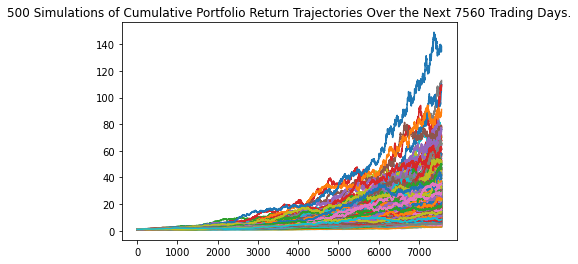

In [25]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

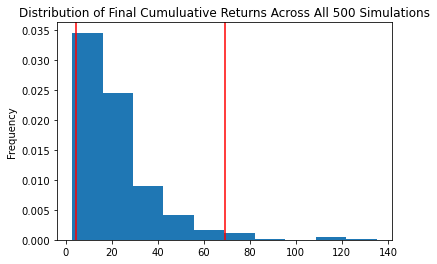

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             22.144520
std              16.959291
min               2.846835
25%              11.147746
50%              17.876201
75%              27.352612
max             135.025417
95% CI Lower      4.401447
95% CI Upper     69.200128
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment to 20000
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $88028.95 and $1384002.56


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $132043.42 and $2076003.84


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
 
#as per the question, changing the ratio to higher stock, so 30% bond 70% stocks. 

MC_five_year = MCSimulation(
    portfolio_data = df_stock_data2,
    weights = [.30, .70 ],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [31]:
# commented out. included for testing purposes only 
#MC_five_year.portfolio_data.head()

In [32]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.021684,0.999825,1.000220,1.005435,0.987365,0.997822,1.015151,1.004370,1.012444,0.994652,...,1.005536,1.001094,1.004258,0.995997,0.992605,1.009974,1.006640,0.983397,1.007204,1.004185
2,1.015961,0.981856,0.994997,1.018256,0.996612,1.000179,1.009630,1.000486,1.021973,0.997968,...,0.992936,1.004849,1.012009,0.994578,0.999665,1.008476,0.994235,0.974402,0.992741,0.989157
3,1.008403,0.983431,0.996901,1.024734,0.995772,1.000300,1.006018,1.001485,1.021212,1.000267,...,0.987342,0.975989,1.007386,0.988103,0.996691,1.002064,0.989867,0.983684,0.991723,0.991915
4,1.007294,0.969551,1.012500,1.012174,1.002358,1.006579,1.005429,1.005079,1.026123,0.987939,...,0.986489,0.978037,1.021707,0.975062,0.998705,0.992366,0.985771,0.984677,1.005200,0.978818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.164017,0.992216,1.289444,1.803742,1.747498,2.843138,3.062698,3.465329,1.720348,2.189263,...,2.364306,1.462590,1.504112,1.924181,1.414024,1.869471,1.639600,1.161136,2.461126,1.495062
1257,1.162646,0.987028,1.302936,1.818542,1.748701,2.820583,3.098814,3.444656,1.699510,2.222645,...,2.345157,1.464171,1.528712,1.924974,1.413078,1.885196,1.644492,1.166679,2.475375,1.497580
1258,1.170324,0.983439,1.316311,1.803382,1.752069,2.808606,3.115554,3.472273,1.720774,2.236646,...,2.329727,1.448477,1.503752,1.930477,1.392480,1.860290,1.663564,1.162204,2.482852,1.492003
1259,1.159002,0.986652,1.326671,1.810569,1.754656,2.857621,3.111401,3.440004,1.756753,2.254331,...,2.327406,1.451215,1.487126,1.915952,1.367853,1.869115,1.680955,1.167294,2.521950,1.487866


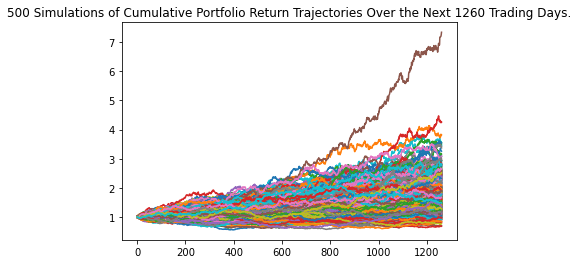

In [33]:
# Plot simulation outcomes
line_plot2 = MC_five_year.plot_simulation()

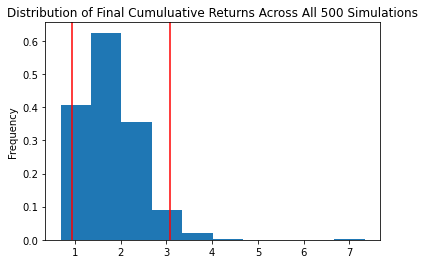

In [34]:
# Plot probability distribution and confidence intervals
dist_plot2 = MC_five_year.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl2 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl2)

count           500.000000
mean              1.795550
std               0.638979
min               0.682239
25%               1.326139
50%               1.690786
75%               2.194865
max               7.340749
95% CI Lower      0.934866
95% CI Upper      3.072629
Name: 1260, dtype: float64


In [36]:
# as per starter code, initalizing new investment to $60000
initial_investment2 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five= round(tbl[8]*initial_investment2,2)
ci_upper_five = round(tbl[9]*initial_investment2,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment2} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $264086.84 and $4152007.68


### Ten Years Retirement Option

In [37]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_year = MCSimulation(
    portfolio_data = df_stock_data2,
    weights = [.30, .70 ],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [38]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
 
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001069,1.011583,0.996962,0.996227,1.004311,1.017087,0.975303,0.992938,0.997514,0.998543,...,1.012361,1.014403,0.998001,0.993764,0.996639,0.999534,0.997772,1.003875,1.018842,1.010275
2,1.023036,1.009107,0.995050,1.001132,1.001072,1.027433,0.970123,0.982196,0.995712,1.016118,...,1.000981,1.016816,1.004061,0.999455,1.002584,1.002169,1.006654,1.013809,1.010504,1.016601
3,1.041468,1.006125,0.992884,1.002431,1.009039,1.004869,0.962624,0.992276,0.988172,1.009320,...,0.994036,1.021944,1.000204,1.002625,1.013802,0.991619,1.004973,1.018285,0.992457,1.002237
4,1.030660,0.989662,0.993624,1.006262,1.001680,1.011916,0.968528,0.993133,0.983018,1.004569,...,1.000770,1.020609,1.002719,1.009278,1.016981,0.995903,0.994012,1.003311,0.986203,1.015763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.897910,2.430008,1.396247,2.727507,2.095404,2.610858,5.635168,3.428896,2.918812,1.564933,...,3.285708,1.674440,2.288367,1.533691,4.955962,4.270565,1.793420,1.288693,4.155471,3.763319
2517,4.877284,2.461596,1.404113,2.693629,2.101510,2.619502,5.660042,3.441166,2.926472,1.569342,...,3.282156,1.685492,2.280616,1.501683,4.958400,4.262249,1.791783,1.296168,4.135789,3.722767
2518,4.898628,2.474623,1.425850,2.734500,2.099887,2.591255,5.613736,3.481701,2.947076,1.553222,...,3.312816,1.698786,2.283016,1.498619,4.954555,4.314683,1.793699,1.295338,4.073212,3.699909
2519,4.884025,2.504140,1.420723,2.758698,2.117362,2.605290,5.627874,3.449545,2.950878,1.578342,...,3.290726,1.691534,2.284458,1.524428,4.906434,4.338537,1.786076,1.307390,4.022826,3.761147


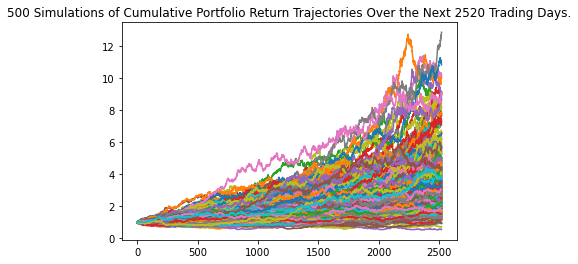

In [39]:
# Plot simulation outcomes
line_plot3 = MC_ten_year.plot_simulation()

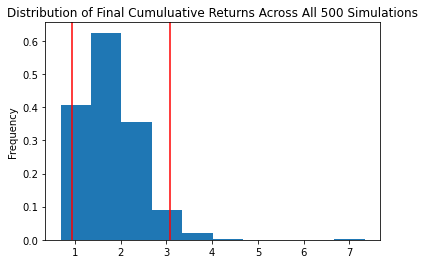

In [40]:
# Plot probability distribution and confidence intervals
dist_plot3 = MC_five_year.plot_distribution()

In [41]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl3 = MC_five_year.summarize_cumulative_return()

# Print summary statistics
print(tbl3)

count           500.000000
mean              1.795550
std               0.638979
min               0.682239
25%               1.326139
50%               1.690786
75%               2.194865
max               7.340749
95% CI Lower      0.934866
95% CI Upper      3.072629
Name: 1260, dtype: float64


In [42]:
# as per starter code, initalizing new investment to $60000
initial_investment3 = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten= round(tbl[8]*initial_investment3,2)
ci_upper_ten = round(tbl[9]*initial_investment3,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment3} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $264086.84 and $4152007.68
